#Student Name: Bianjiang Yang 
#ECE 595 Machine Learning II
#Project 1: CLDNN - Student Code

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Sep 15 21:24:39 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#Import necessary packages
import keras
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Reshape, LSTM
import matplotlib.pyplot as plt
import cPickle

Using TensorFlow backend.


#Part 0: Importing and normalizing data

In [ ]:
#Import dataset and normalize to [0,1]
#Has shape (num_samples, 28, 28)
(data_train, labels_train), (data_test, labels_test) = fashion_mnist.load_data()
data_train = data_train/255.0
data_test = data_test/255.0
data_train = data_train.reshape(60000, 28, 28, 1)
data_test = data_test.reshape(10000, 28, 28, 1)

#Create labels as one-hot vectors
#labels_train and labels_test have shapes (60000, 10) and (10000 10,) respectively
labels_train = keras.utils.np_utils.to_categorical(labels_train, num_classes=10)
labels_test = keras.utils.np_utils.to_categorical(labels_test, num_classes=10)

4431872/4422102 [==============================] - 1s 0us/step


#Part 1: Plotting cross entropy

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


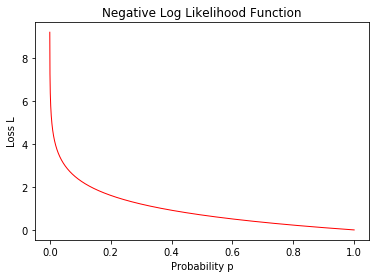

In [ ]:
#Show cross-entropy loss function
p = np.linspace(0,1,10000) # p range from 0 to 1 with 10000 dots
L = (-1)*np.log(p)  #Negative Log Likelihood Function
plt.title("Negative Log Likelihood Function")  # plot title
plt.plot(p,L,color = 'red',linewidth = 1)  # plot line
plt.xlabel('Probability p')  # x axis label
plt.ylabel('Loss L')  # y axis label
plt.show()  # show the plot
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT

Answer the following questions:


1.   How is the the negative log-likelihood of p affected when p is small? How about when p is large?

  ANS: When p is small, the negative log-likelihood of p is very large, which means the loss will be very large. The learning will be fast.
  When p is large (near 1), the loss will near 0, which means the gradient will be small, indicating the learning will be slow.

2.   Why does the behavior of the negative log-likelihood function make it a good objective function for a minimization problem specifically when the output can be interpreted as a probability space?

  ANS: If the output can be interpreted as a probability space, the smaller the probability means the output mismatches with the label. 
  In negative log-likelihood function, the smaller probability input will indicate larger loss, which will facilitate the minimization learning. So it's a good objective function for minimization problem.

#Part 2: Overfit CNN

In [ ]:
#Create and train model architecture
def CNN_overfit():
    #Easiest way to build model in Keras is using Squential. It allows models to 
    #be built layer by layer as we will do here
    model = Sequential()
    model.add(Conv2D(256,(3,3),activation="relu", input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128,(3,3),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation="relu", kernel_initializer="normal"))
    model.add(Dense(100, activation="relu", kernel_initializer="normal"))
    model.add(Dense(10, activation="softmax"))
    #FILL THIS IN WITH MODEL ARCHITECTURE

    return model

#Create instance of CNN model graph
CNN_overfit = CNN_overfit()

#Compile model using an appropriate loss and optimizer algorithm
CNN_overfit.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

#Train the model and assign training meta-data to a variable
CNN_mdata = CNN_overfit.fit(
  data_train, # training data
  labels_train, # training targets
  validation_data=(data_test, labels_test),
  epochs=200,
  batch_size=1024,
)

#Print accuracy of model on testing set after training 
scores = CNN_overfit.evaluate(data_test, labels_test)
print "Accuracy: %.2f%%" %(scores[1]*100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 12s 192us/step - loss: 0.9341 - accuracy: 0.6517 - val_loss: 0.5712 - val_accuracy: 0.7881
Epoch 2/200
60000/60000 [==============================] - 6s 94us/step - loss: 0.4826 - accuracy: 0.8216 - val_loss: 0.4419 - val_accuracy: 0.8437
Epoch 3/200
60000/60000 [==============================] - 6s 95us/step - loss: 0.3977 - accuracy: 0.8565 - val_loss: 0.4008 - val_accuracy: 0.8551
Epoch 4/200
60000/60000 [==============================] - 6s 95us/step - loss: 0.3575 - accuracy: 0.8719 - val_loss: 0.3560 - val_accuracy: 0.8732
Epoch 5/200
60000/60000 [==============================] - 6s 95us/step - loss: 0.3283 - accuracy: 0.8809 - val_loss: 0.3433 - val_accuracy: 0.8790
Epoch 6/200
60000/60000 [==============================] - 6s 95us/step - loss: 0.3056 - accuracy: 0.8901 - val_loss: 0.3267 - val_accuracy: 0.8837
Epoch 7/200
60000/60000 [==============================] - 6

['loss', 'val_accuracy', 'val_loss', 'accuracy']


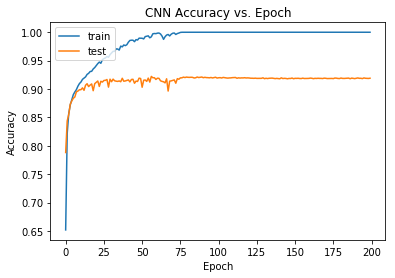

In [ ]:
#Plot accuracy vs epoch
print CNN_mdata.history.keys()
plt.plot(CNN_mdata.history['accuracy'])
plt.plot(CNN_mdata.history['val_accuracy'])
plt.title('CNN Accuracy vs. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

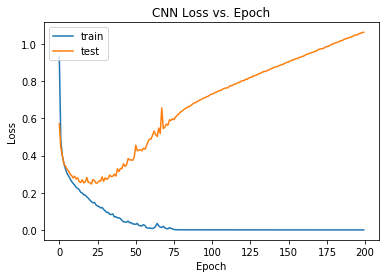

In [ ]:
#Plot loss vs epoch
plt.plot (CNN_mdata.history [ 'loss' ] )
plt.plot (CNN_mdata.history [ 'val_loss' ] )
plt.title ('CNN Loss vs. Epoch')
plt.ylabel ('Loss')
plt.xlabel ('Epoch')
plt.legend (['train' , 'test'] , loc='upper left')
plt.show()

Answer the following questions: 



1.   What does the loss of the training set go to? 

  ANS: The loss of the training set decreases.

2.   What does the loss of the testing set go to? 

  ANS: The loss of the testing set decreases at the beginning and quickly goes up after about the 25th epoch.
  
3.   What is the reason for the discrepancy between the training and testing set loss? 

  ANS: The neural network overfits a lot on training dataset. During training, the objective of the neural network is to reduce the training set loss, so the loss of the training set goes down. However, the data distribution of the training dataset is different from the testing dataset, after fitting too much on training set, the testing set loss will increase.

4.   Explain why the accuracy of the testing set, after training, differs so much from the testing set regardless of achieving high training accuracy. Name two ways to avoid this. 

  ANS: The neural network overfits a lot on training dataset. Since the data distribution of the training dataset is different from the testing dataset, the accuracy of the testing set will be lower than that of the training set because the neural network only learned features of the training set.
  
  Way1: Dropout.During the training process, the neurons of some hidden layers were deleted randomly according to the given probability, while the neurons of input layer and output layer were kept unchanged. Due to the randomness to eliminate neurons, each batch data makes the network has certain sparse, thus can reduce the synergistic effect between different characteristics. Since only part of the parameters of the entire network neurons is updated, eliminate joint adaptability between neurons is weakened, which can enhance the generalization ability of neural network and robustness.
  
  Way2: Data Augmentation. Image translation, flip, zoom, cutting, adding moise and other means to expand the training dataset.

#Part 3: Dropout on input layer

In [ ]:
#Create and train model architecture
def CNN_dropout_in():
    model = Sequential()
    model.add(Dropout(0.3, input_shape=(28,28,1)))
    model.add(Conv2D(256,(3,3),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128,(3,3),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation="relu", kernel_initializer="normal"))
    model.add(Dense(100, activation="relu", kernel_initializer="normal"))
    model.add(Dense(10, activation="softmax"))
    
    return model

#Create instance of CNN model graph
CNN_dropout_in = CNN_dropout_in()

#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_in.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

#Train the model and assign training meta-data to a variable
CNN_dropout_in_mdata = CNN_dropout_in.fit(
  data_train, # training data
  labels_train, # training targets
  validation_data=(data_test, labels_test),
  epochs=200,
  batch_size=1024,
)

#Print accuracy of model on testing set after training 
CNN_dropout_in_scores = CNN_dropout_in.evaluate(data_test, labels_test)
print "Accuracy: %.2f%%" %(CNN_dropout_in_scores[1]*100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 6s 98us/step - loss: 1.0002 - accuracy: 0.6400 - val_loss: 0.7095 - val_accuracy: 0.7391
Epoch 2/200
60000/60000 [==============================] - 6s 94us/step - loss: 0.5764 - accuracy: 0.7844 - val_loss: 0.5793 - val_accuracy: 0.7919
Epoch 3/200
60000/60000 [==============================] - 6s 95us/step - loss: 0.4865 - accuracy: 0.8179 - val_loss: 0.5166 - val_accuracy: 0.8159
Epoch 4/200
60000/60000 [==============================] - 6s 95us/step - loss: 0.4384 - accuracy: 0.8382 - val_loss: 0.4854 - val_accuracy: 0.8272
Epoch 5/200
60000/60000 [==============================] - 6s 95us/step - loss: 0.4093 - accuracy: 0.8486 - val_loss: 0.4879 - val_accuracy: 0.8336
Epoch 6/200
60000/60000 [==============================] - 6s 95us/step - loss: 0.3906 - accuracy: 0.8540 - val_loss: 0.4559 - val_accuracy: 0.8442
Epoch 7/200
60000/60000 [==============================] - 6s 

['loss', 'val_accuracy', 'val_loss', 'accuracy']


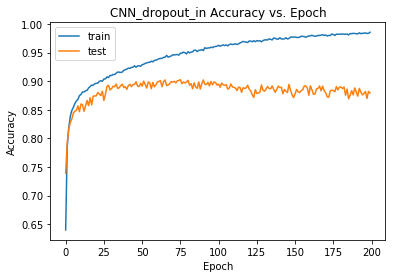

In [ ]:
#Plot accuracy vs epoch
print CNN_dropout_in_mdata.history.keys()
plt.plot(CNN_dropout_in_mdata.history['accuracy'])
plt.plot(CNN_dropout_in_mdata.history['val_accuracy'])
plt.title('CNN_dropout_in Accuracy vs. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

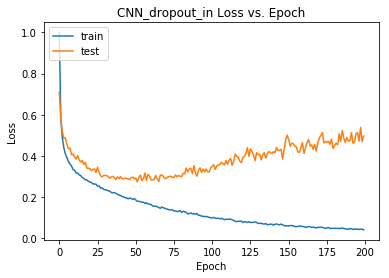

In [ ]:
#Plot loss vs epoch
plt.plot (CNN_dropout_in_mdata.history [ 'loss' ] )
plt.plot (CNN_dropout_in_mdata.history [ 'val_loss' ] )
plt.title ('CNN_dropout_in Loss vs. Epoch')
plt.ylabel ('Loss')
plt.xlabel ('Epoch')
plt.legend (['train' , 'test'] , loc='upper left')
plt.show()

Answer the following questions: 



1.   What does the loss of the training set go to? 

  ANS: It decreases all the time but the speed of the decrease is also decreasing.
  
2.   What does the loss of the testing set go to? 

  ANS: It firstly goes down suddenly and after about the 70th epoch, it increases.

3.   Why is the loss of the training set so different from the loss of the testing set regardless of using dropout? 

  ANS: Although adding dropout before the first hidden layer can reduce the effect of the overfitting to some extent because the overfitting happens later than that without dropout, adding dropout to the input images which  makes each sample randomly dropout values which doesn't fascilitate training is still not a good strategy than adding it to the feature maps after the convolutional layers.

#Part 4-I: Dropout on Hidden Layers

In [ ]:
#Create and train model architecture
def CNN_dropout_hidden():
    model = Sequential()
    model.add(Conv2D(256,(3,3),activation="relu", input_shape=(28,28,1)))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128,(3,3),activation="relu"))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation="relu", kernel_initializer="normal"))
    model.add(Dense(100, activation="relu", kernel_initializer="normal"))
    model.add(Dense(10, activation="softmax"))
    
    return model

#Create instance of CNN model graph
CNN_dropout_hidden = CNN_dropout_hidden()

#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_hidden.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

#Train the model and assign training meta-data to a variable
CNN_dropout_hidden_mdata = CNN_dropout_hidden.fit(
  data_train, # training data
  labels_train, # training targets
  validation_data=(data_test, labels_test),
  epochs=200,
  batch_size=1024,
)

#Print accuracy of model on testing set after training 
CNN_dropout_hidden_scores = CNN_dropout_hidden.evaluate(data_test, labels_test)
print "Accuracy: %.2f%%" %(CNN_dropout_hidden_scores[1]*100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 11s 183us/step - loss: 0.8526 - accuracy: 0.6881 - val_loss: 0.6589 - val_accuracy: 0.7807
Epoch 2/200
60000/60000 [==============================] - 11s 179us/step - loss: 0.4770 - accuracy: 0.8237 - val_loss: 0.5387 - val_accuracy: 0.8416
Epoch 3/200
60000/60000 [==============================] - 11s 179us/step - loss: 0.3946 - accuracy: 0.8586 - val_loss: 0.4738 - val_accuracy: 0.8520
Epoch 4/200
60000/60000 [==============================] - 11s 179us/step - loss: 0.3564 - accuracy: 0.8719 - val_loss: 0.4642 - val_accuracy: 0.8495
Epoch 5/200
60000/60000 [==============================] - 11s 180us/step - loss: 0.3318 - accuracy: 0.8782 - val_loss: 0.4112 - val_accuracy: 0.8765
Epoch 6/200
60000/60000 [==============================] - 11s 180us/step - loss: 0.3085 - accuracy: 0.8878 - val_loss: 0.3720 - val_accuracy: 0.8861
Epoch 7/200
60000/60000 [=========================

['loss', 'val_accuracy', 'val_loss', 'accuracy']


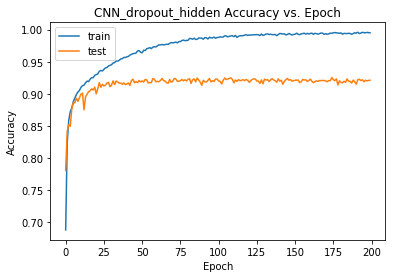

In [ ]:
#Plot accuracy vs epoch
print CNN_dropout_hidden_mdata.history.keys()
plt.plot(CNN_dropout_hidden_mdata.history['accuracy'])
plt.plot(CNN_dropout_hidden_mdata.history['val_accuracy'])
plt.title('CNN_dropout_hidden Accuracy vs. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

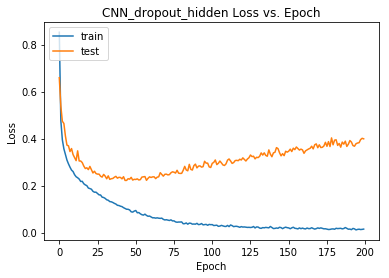

In [ ]:
#Plot loss vs epoch
plt.plot (CNN_dropout_hidden_mdata.history [ 'loss' ] )
plt.plot (CNN_dropout_hidden_mdata.history [ 'val_loss' ] )
plt.title ('CNN_dropout_hidden Loss vs. Epoch')
plt.ylabel ('Loss')
plt.xlabel ('Epoch')
plt.legend (['train' , 'test'] , loc='upper left')
plt.show()

Answer the following questions:



1.   What does the loss of the training set go to? 

  ANS: It decreases all the time but the speed of the decrease is also decreasing.
  
2.   What does the loss of the testing set go to? 

  ANS: It decreases and finally increases. But the accuracy is larger than that of the architecture in Part 3.

3.   Why was using dropout more effective here in comparison to the architecture in Part 3? 

  ANS: Empirically, Dropout was used after the activation function of each convolutional layer: CONV->RELU->DROP. Also, in convolutional network, the dropout rates are usually smaller than 30%. In this network, the dropout layers are put in the appropriate layers and the dropout rates are also appropriate.
  
4.   What is the difference in accuracy, after training, between the training and testing set? Is the model a good fit for the data? 

  ANS: The accuracy of training is 99.5%, however in testing it is 92.1%. But the gap is smaller than other models I have trained. So it is a good fit for the data, but still can be improved.

#Part 4-II [Sub-Question 5]: Dropout on Input and Hidden Layers

In [ ]:
#Create and train model architecture
def CNN_dropout_both():
    model = Sequential()
    model.add(Dropout(0.3, input_shape=(28,28,1)))
    model.add(Conv2D(256,(3,3),activation="relu"))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128,(3,3),activation="relu"))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation="relu", kernel_initializer="normal"))
    model.add(Dense(100, activation="relu", kernel_initializer="normal"))
    model.add(Dense(10, activation="softmax"))
    
    return model

#Create instance of CNN model graph
CNN_dropout_both = CNN_dropout_both()

#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_both.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

#Train the model and assign training meta-data to a variable
CNN_dropout_both_mdata = CNN_dropout_both.fit(
  data_train, # training data
  labels_train, # training targets
  validation_data=(data_test, labels_test),
  epochs=200,
  batch_size=1024,
)

#Print accuracy of model on testing set after training 
CNN_dropout_both_scores = CNN_dropout_both.evaluate(data_test, labels_test)
print "Accuracy: %.2f%%" %(CNN_dropout_both_scores[1]*100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 11s 184us/step - loss: 0.9236 - accuracy: 0.6565 - val_loss: 0.8612 - val_accuracy: 0.7391
Epoch 2/200
60000/60000 [==============================] - 11s 180us/step - loss: 0.5540 - accuracy: 0.7914 - val_loss: 0.7342 - val_accuracy: 0.8117
Epoch 3/200
60000/60000 [==============================] - 11s 181us/step - loss: 0.4891 - accuracy: 0.8162 - val_loss: 0.6961 - val_accuracy: 0.8129
Epoch 4/200
60000/60000 [==============================] - 11s 180us/step - loss: 0.4460 - accuracy: 0.8355 - val_loss: 0.6372 - val_accuracy: 0.8378
Epoch 5/200
60000/60000 [==============================] - 11s 180us/step - loss: 0.4163 - accuracy: 0.8457 - val_loss: 0.6002 - val_accuracy: 0.8468
Epoch 6/200
60000/60000 [==============================] - 11s 180us/step - loss: 0.3969 - accuracy: 0.8535 - val_loss: 0.5900 - val_accuracy: 0.8515
Epoch 7/200
60000/60000 [=========================

['loss', 'val_accuracy', 'val_loss', 'accuracy']


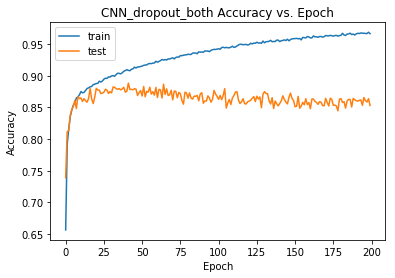

In [ ]:
#Plot accuracy vs epoch
print CNN_dropout_both_mdata.history.keys()
plt.plot(CNN_dropout_both_mdata.history['accuracy'])
plt.plot(CNN_dropout_both_mdata.history['val_accuracy'])
plt.title('CNN_dropout_both Accuracy vs. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

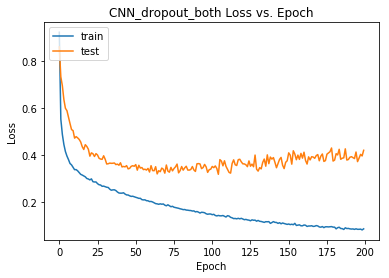

In [ ]:
#Plot loss vs epoch
plt.plot (CNN_dropout_both_mdata.history [ 'loss' ] )
plt.plot (CNN_dropout_both_mdata.history [ 'val_loss' ] )
plt.title ('CNN_dropout_both Loss vs. Epoch')
plt.ylabel ('Loss')
plt.xlabel ('Epoch')
plt.legend (['train' , 'test'] , loc='upper left')
plt.show()

Answer the following questions: 

1.   What does the loss of the training set go to? 

  ANS: It decreases all the time but the speed of the decrease is also decreasing.
  
2.   What does the loss of the testing set go to? 

  ANS: It decreases and finally increases. But the increasing speed is small.
  
3.   What is the difference in accuracy, after training, between the training and testing set?  

  ANS: The training accuracy is ~96%, however, the testing accuracy stuck at 86% or so.

4.   Compare results in 4 with results in 5. Comment on robustness and accuracy.

  ANS: Accuracy in 4 is larger than that in 5 regardless of training or testing. However, the testing loss in 4 increases a lot after the 50th epoch. But the testing loss in 5 only increases a little. So, Accuracy: 4>5; Robustness: 4<5.

#Part 5 : Activation Functions

In [ ]:
#Create and train model architecture
def CNN_dropout_both_act():
    model = Sequential()# use 'sigmoid' for point 1 and use 'tanh' for point 2
    #model.add(Dropout(0.3, input_shape=(28,28,1)))
    model.add(Conv2D(256,(3,3),activation="relu", input_shape=(28,28,1)))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128,(3,3),activation="relu"))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation="relu", kernel_initializer="normal"))
    model.add(Dense(100, activation="relu", kernel_initializer="normal"))
    model.add(Dense(10, activation="sigmoid"))#tanh
    
    return model

#Create instance of CNN model graph
CNN_dropout_both_act = CNN_dropout_both_act()

#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_both_act.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

#Train the model and assign training meta-data to a variable
CNN_dropout_both_act_mdata = CNN_dropout_both_act.fit(
  data_train, # training data
  labels_train, # training targets
  validation_data=(data_test, labels_test),
  epochs=200,
  batch_size=1024,
)

#Print accuracy of model on testing set after training 
CNN_dropout_both_act_scores = CNN_dropout_both_act.evaluate(data_test, labels_test)
print "Accuracy: %.2f%%" %(CNN_dropout_both_act_scores[1]*100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 11s 183us/step - loss: 1.0417 - accuracy: 0.6346 - val_loss: 0.7341 - val_accuracy: 0.7629
Epoch 2/200
60000/60000 [==============================] - 11s 179us/step - loss: 0.5030 - accuracy: 0.8126 - val_loss: 0.5825 - val_accuracy: 0.8366
Epoch 3/200
60000/60000 [==============================] - 11s 179us/step - loss: 0.4100 - accuracy: 0.8535 - val_loss: 0.4966 - val_accuracy: 0.8456
Epoch 4/200
60000/60000 [==============================] - 11s 179us/step - loss: 0.3789 - accuracy: 0.8642 - val_loss: 0.4862 - val_accuracy: 0.8525
Epoch 5/200
60000/60000 [==============================] - 11s 179us/step - loss: 0.3459 - accuracy: 0.8764 - val_loss: 0.4383 - val_accuracy: 0.8696
Epoch 6/200
60000/60000 [==============================] - 11s 181us/step - loss: 0.3313 - accuracy: 0.8799 - val_loss: 0.4281 - val_accuracy: 0.8771
Epoch 7/200
60000/60000 [=========================

['loss', 'val_accuracy', 'val_loss', 'accuracy']


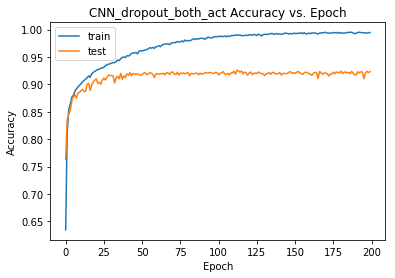

In [ ]:
#Plot accuracy vs epoch
print CNN_dropout_both_act_mdata.history.keys()
plt.plot(CNN_dropout_both_act_mdata.history['accuracy'])
plt.plot(CNN_dropout_both_act_mdata.history['val_accuracy'])
plt.title('CNN_dropout_both_act Accuracy vs. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

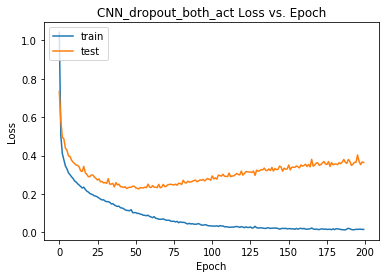

In [ ]:
#Plot loss vs epoch
plt.plot (CNN_dropout_both_act_mdata.history [ 'loss' ] )
plt.plot (CNN_dropout_both_act_mdata.history [ 'val_loss' ] )
plt.title ('CNN_dropout_both_act Loss vs. Epoch')
plt.ylabel ('Loss')
plt.xlabel ('Epoch')
plt.legend (['train' , 'test'] , loc='upper left')
plt.show()

Part5-II tanh and cross-entropy loss

In [ ]:
#Create and train model architecture
def CNN_dropout_both_tanh():
    model = Sequential()# use 'sigmoid' for point 1 and use 'tanh' for point 2
    #model.add(Dropout(0.3, input_shape=(28,28,1)))
    model.add(Conv2D(256,(3,3),activation="relu", input_shape=(28,28,1)))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128,(3,3),activation="relu"))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation="relu", kernel_initializer="normal"))
    model.add(Dense(100, activation="relu", kernel_initializer="normal"))
    model.add(Dense(10, activation="tanh"))
    
    return model

#Create instance of CNN model graph
CNN_dropout_both_tanh = CNN_dropout_both_tanh()

#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_both_tanh.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

#Train the model and assign training meta-data to a variable
CNN_dropout_both_tanh_mdata = CNN_dropout_both_tanh.fit(
  data_train, # training data
  labels_train, # training targets
  validation_data=(data_test, labels_test),
  epochs=200,
  batch_size=1024,
)

#Print accuracy of model on testing set after training 
CNN_dropout_both_tanh_scores = CNN_dropout_both_tanh.evaluate(data_test, labels_test)
print "Accuracy: %.2f%%" %(CNN_dropout_both_tanh_scores[1]*100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 11s 186us/step - loss: 6.8917 - accuracy: 0.1485 - val_loss: 6.8314 - val_accuracy: 0.1604
Epoch 2/200
60000/60000 [==============================] - 11s 179us/step - loss: 6.8374 - accuracy: 0.1015 - val_loss: 6.6993 - val_accuracy: 0.1000
Epoch 3/200
60000/60000 [==============================] - 11s 179us/step - loss: 6.8525 - accuracy: 0.1001 - val_loss: 6.8581 - val_accuracy: 0.1012
Epoch 4/200
60000/60000 [==============================] - 11s 179us/step - loss: 7.7087 - accuracy: 0.1609 - val_loss: 8.0592 - val_accuracy: 0.1000
Epoch 5/200
60000/60000 [==============================] - 11s 179us/step - loss: 8.0590 - accuracy: 0.1559 - val_loss: 8.0591 - val_accuracy: 0.1000
Epoch 6/200
60000/60000 [==============================] - 11s 179us/step - loss: 8.0590 - accuracy: 0.1558 - val_loss: 8.0591 - val_accuracy: 0.1000
Epoch 7/200
60000/60000 [=========================

['loss', 'val_accuracy', 'val_loss', 'accuracy']


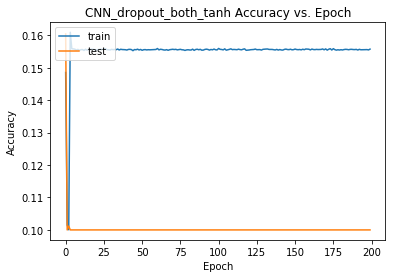

In [ ]:
#Plot accuracy vs epoch
print CNN_dropout_both_tanh_mdata.history.keys()
plt.plot(CNN_dropout_both_tanh_mdata.history['accuracy'])
plt.plot(CNN_dropout_both_tanh_mdata.history['val_accuracy'])
plt.title('CNN_dropout_both_tanh Accuracy vs. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

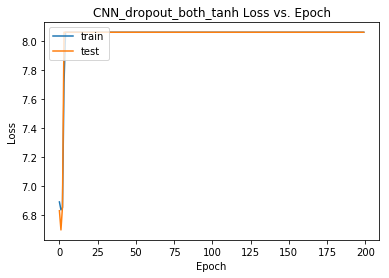

In [ ]:
#Plot loss vs epoch
plt.plot (CNN_dropout_both_tanh_mdata.history [ 'loss' ] )
plt.plot (CNN_dropout_both_tanh_mdata.history [ 'val_loss' ] )
plt.title ('CNN_dropout_both_tanh Loss vs. Epoch')
plt.ylabel ('Loss')
plt.xlabel ('Epoch')
plt.legend (['train' , 'test'] , loc='upper left')
plt.show()

part5-II tanh and mseloss

In [ ]:
#Create and train model architecture
def CNN_dropout_both_tanh_mse():
    model = Sequential()# use 'sigmoid' for point 1 and use 'tanh' for point 2
    model.add(Dropout(0.3, input_shape=(28,28,1)))
    model.add(Conv2D(256,(3,3),activation="relu"))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128,(3,3),activation="relu"))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation="relu", kernel_initializer="normal"))
    model.add(Dense(100, activation="relu", kernel_initializer="normal"))
    model.add(Dense(10, activation="tanh"))
    
    return model

#Create instance of CNN model graph
CNN_dropout_both_tanh_mse = CNN_dropout_both_tanh_mse()

#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_both_tanh_mse.compile(
  optimizer='adam',
  loss='mean_squared_error',
  metrics=['accuracy'],
)

#Train the model and assign training meta-data to a variable
CNN_dropout_both_tanh_mse_mdata = CNN_dropout_both_tanh_mse.fit(
  data_train, # training data
  labels_train, # training targets
  validation_data=(data_test, labels_test),
  epochs=100,
  batch_size=1024,
)

#Print accuracy of model on testing set after training 
CNN_dropout_both_tanh_mse_scores = CNN_dropout_both_tanh_mse.evaluate(data_test, labels_test)
print "Accuracy: %.2f%%" %(CNN_dropout_both_tanh_mse_scores[1]*100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 13s 224us/step - loss: 0.0555 - accuracy: 0.6279 - val_loss: 0.0542 - val_accuracy: 0.7521
Epoch 2/100
60000/60000 [==============================] - 11s 179us/step - loss: 0.0339 - accuracy: 0.7870 - val_loss: 0.0438 - val_accuracy: 0.8011
Epoch 3/100
60000/60000 [==============================] - 11s 180us/step - loss: 0.0288 - accuracy: 0.8179 - val_loss: 0.0387 - val_accuracy: 0.8274
Epoch 4/100
60000/60000 [==============================] - 11s 180us/step - loss: 0.0258 - accuracy: 0.8353 - val_loss: 0.0345 - val_accuracy: 0.8358
Epoch 5/100
60000/60000 [==============================] - 11s 180us/step - loss: 0.0237 - accuracy: 0.8480 - val_loss: 0.0311 - val_accuracy: 0.8376
Epoch 6/100
60000/60000 [==============================] - 11s 180us/step - loss: 0.0222 - accuracy: 0.8571 - val_loss: 0.0296 - val_accuracy: 0.8408
Epoch 7/100
60000/60000 [=========================

['loss', 'val_accuracy', 'val_loss', 'accuracy']


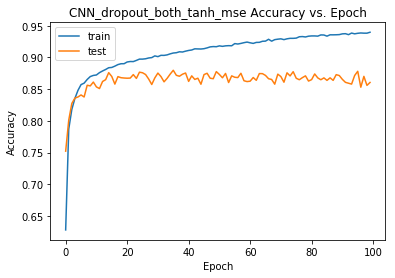

In [ ]:
#Plot accuracy vs epoch
print CNN_dropout_both_tanh_mse_mdata.history.keys()
plt.plot(CNN_dropout_both_tanh_mse_mdata.history['accuracy'])
plt.plot(CNN_dropout_both_tanh_mse_mdata.history['val_accuracy'])
plt.title('CNN_dropout_both_tanh_mse Accuracy vs. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

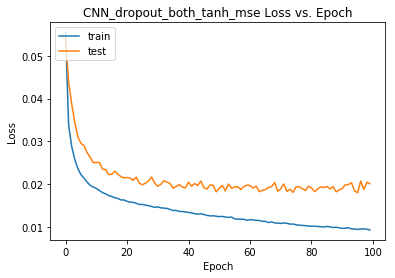

In [ ]:
#Plot loss vs epoch
plt.plot (CNN_dropout_both_tanh_mse_mdata.history [ 'loss' ] )
plt.plot (CNN_dropout_both_tanh_mse_mdata.history [ 'val_loss' ] )
plt.title ('CNN_dropout_both_tanh_mse Loss vs. Epoch')
plt.ylabel ('Loss')
plt.xlabel ('Epoch')
plt.legend (['train' , 'test'] , loc='upper left')
plt.show()

*Part5*-Bonus a-I

In [ ]:
#Create and train model architecture
def CNN_dropout_both_sigmoid_hidden():
    model = Sequential()
    model.add(Dropout(0.3, input_shape=(28,28,1)))
    model.add(Conv2D(256,(3,3),activation="sigmoid"))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128,(3,3),activation="sigmoid"))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation="sigmoid", kernel_initializer="normal"))
    model.add(Dense(100, activation="sigmoid", kernel_initializer="normal"))
    model.add(Dense(10, activation="softmax"))
    
    return model

#Create instance of CNN model graph
CNN_dropout_both_sigmoid_hidden = CNN_dropout_both_sigmoid_hidden()

#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_both_sigmoid_hidden.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

#Train the model and assign training meta-data to a variable
CNN_dropout_both_sigmoid_hidden_mdata = CNN_dropout_both_sigmoid_hidden.fit(
  data_train, # training data
  labels_train, # training targets
  validation_data=(data_test, labels_test),
  epochs=100,
  batch_size=1024,
)

#Print accuracy of model on testing set after training 
CNN_dropout_both_sigmoid_hidden_scores = CNN_dropout_both_sigmoid_hidden.evaluate(data_test, labels_test)
print "Accuracy: %.2f%%" %(CNN_dropout_both_sigmoid_hidden_scores[1]*100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 11s 182us/step - loss: 2.3085 - accuracy: 0.0979 - val_loss: 2.3054 - val_accuracy: 0.1000
Epoch 2/100
60000/60000 [==============================] - 11s 177us/step - loss: 2.3047 - accuracy: 0.0989 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 3/100
60000/60000 [==============================] - 11s 177us/step - loss: 2.3039 - accuracy: 0.1028 - val_loss: 2.3033 - val_accuracy: 0.1000
Epoch 4/100
60000/60000 [==============================] - 11s 177us/step - loss: 2.3049 - accuracy: 0.0992 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 5/100
60000/60000 [==============================] - 11s 178us/step - loss: 2.3044 - accuracy: 0.0986 - val_loss: 2.3037 - val_accuracy: 0.1000
Epoch 6/100
60000/60000 [==============================] - 11s 178us/step - loss: 2.3045 - accuracy: 0.0992 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 7/100
60000/60000 [=========================

['loss', 'val_accuracy', 'val_loss', 'accuracy']


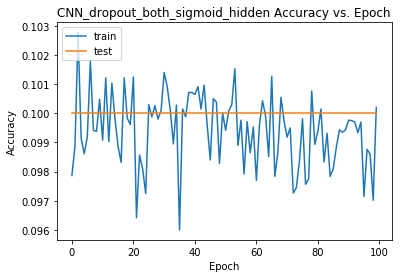

In [ ]:
#Plot accuracy vs epoch
print CNN_dropout_both_sigmoid_hidden_mdata.history.keys()
plt.plot(CNN_dropout_both_sigmoid_hidden_mdata.history['accuracy'])
plt.plot(CNN_dropout_both_sigmoid_hidden_mdata.history['val_accuracy'])
plt.title('CNN_dropout_both_sigmoid_hidden Accuracy vs. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

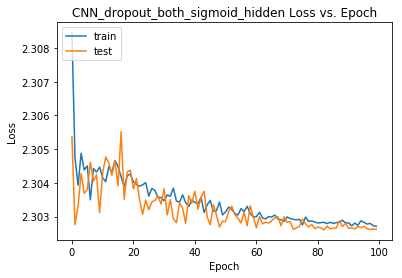

In [ ]:
#Plot loss vs epoch
plt.plot (CNN_dropout_both_sigmoid_hidden_mdata.history [ 'loss' ] )
plt.plot (CNN_dropout_both_sigmoid_hidden_mdata.history [ 'val_loss' ] )
plt.title ('CNN_dropout_both_sigmoid_hidden Loss vs. Epoch')
plt.ylabel ('Loss')
plt.xlabel ('Epoch')
plt.legend (['train' , 'test'] , loc='upper left')
plt.show()

Part5-Bonus a-II

In [ ]:
#Create and train model architecture
def CNN_dropout_both_tanh_hidden():
    model = Sequential()
    model.add(Dropout(0.3, input_shape=(28,28,1)))
    model.add(Conv2D(256,(3,3),activation="tanh"))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128,(3,3),activation="tanh"))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation="tanh", kernel_initializer="normal"))
    model.add(Dense(100, activation="tanh", kernel_initializer="normal"))
    model.add(Dense(10, activation="softmax"))
    
    return model

#Create instance of CNN model graph
CNN_dropout_both_tanh_hidden = CNN_dropout_both_tanh_hidden()

#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_both_tanh_hidden.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

#Train the model and assign training meta-data to a variable
CNN_dropout_both_tanh_hidden_mdata = CNN_dropout_both_tanh_hidden.fit(
  data_train, # training data
  labels_train, # training targets
  validation_data=(data_test, labels_test),
  epochs=100,
  batch_size=1024,
)

#Print accuracy of model on testing set after training 
CNN_dropout_both_tanh_hidden_scores = CNN_dropout_both_tanh_hidden.evaluate(data_test, labels_test)
print "Accuracy: %.2f%%" %(CNN_dropout_both_tanh_hidden_scores[1]*100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 11s 183us/step - loss: 0.8588 - accuracy: 0.6890 - val_loss: 0.8034 - val_accuracy: 0.7142
Epoch 2/100
60000/60000 [==============================] - 11s 179us/step - loss: 0.5172 - accuracy: 0.8051 - val_loss: 0.7767 - val_accuracy: 0.7390
Epoch 3/100
60000/60000 [==============================] - 11s 179us/step - loss: 0.4573 - accuracy: 0.8292 - val_loss: 0.7794 - val_accuracy: 0.7217
Epoch 4/100
60000/60000 [==============================] - 11s 179us/step - loss: 0.4178 - accuracy: 0.8440 - val_loss: 0.7802 - val_accuracy: 0.7348
Epoch 5/100
60000/60000 [==============================] - 11s 180us/step - loss: 0.3929 - accuracy: 0.8546 - val_loss: 0.6969 - val_accuracy: 0.7524
Epoch 6/100
60000/60000 [==============================] - 11s 180us/step - loss: 0.3773 - accuracy: 0.8584 - val_loss: 0.6966 - val_accuracy: 0.7679
Epoch 7/100
60000/60000 [=========================

['loss', 'val_accuracy', 'val_loss', 'accuracy']


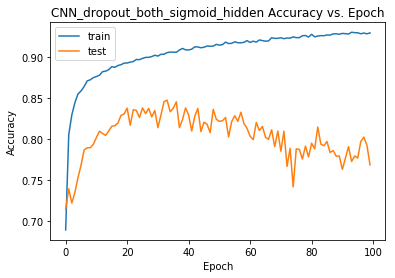

In [ ]:
#Plot accuracy vs epoch
print CNN_dropout_both_tanh_hidden_mdata.history.keys()
plt.plot(CNN_dropout_both_tanh_hidden_mdata.history['accuracy'])
plt.plot(CNN_dropout_both_tanh_hidden_mdata.history['val_accuracy'])
plt.title('CNN_dropout_both_sigmoid_hidden Accuracy vs. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

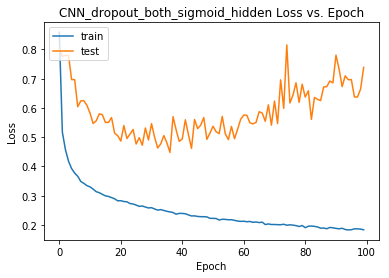

In [ ]:
#Plot loss vs epoch
plt.plot (CNN_dropout_both_tanh_hidden_mdata.history [ 'loss' ] )
plt.plot (CNN_dropout_both_tanh_hidden_mdata.history [ 'val_loss' ] )
plt.title ('CNN_dropout_both_sigmoid_hidden Loss vs. Epoch')
plt.ylabel ('Loss')
plt.xlabel ('Epoch')
plt.legend (['train' , 'test'] , loc='upper left')
plt.show()

Answer the following questions: 

1-c.   Compare the above results with softmax results (with point 5 results of Part 4-II)

  ANS: Sigmoid: 99.4%/92.3%; Softmax: 96.7%/86.3%. So Sigmoid is better. But since the Part 4-II network has 3 dropout, it may affect the result. So I also picked up Part 4-I result: 99.5%/92.1%. Actually, these two results are similar.
  
2-a.   Does ‘tanh’ as output activation work with Cross-entropy loss?

  ANS: No, it doesn't. As I show in the plot, the network learns nothing.

2-b.   Give a reason why tanh is not recommended with cross entropy loss?

  ANS: The output range of tanh is [-1 1], but the negative log function takes only [0,1] inputs. Taking the negative output from tanh function will lead learning to failure.

2-c.   Give a reason why sigmoid does not cause problem as tanh with Cross entropy loss?

  ANS: The output range of sigmoid is [0 1].


#Part 6: Creating a CLDNN

Run the code in the block below 'as is.' After executing, the high SNR RadioML training and testing data will be stored in the arrays X_train and X_test, respectively. Their respective one-hot labels will be stored in Y_train and Y_test. 

In [ ]:
#Download RML 2016.10b dataset and untar file
#!wget http://opendata.deepsig.io/datasets/2016.10/RML2016.10b.tar.bz2
#!tar -xvjf RML2016.10b.tar.bz2
!wget --no-check-certificate https://f002.backblazeb2.com/file/deepsig-datasets/2016.10/RML2016.10b.tar.bz2?Authorization=3_20210910163223_59bc988f743c195bfc87dfae_6df26323f4f9868394edcc78620e14b30b64f7ad_002_20210910173223_0027_dnld -O RML2016.10b.tar.bz2
!tar -xvjf RML2016.10b.tar.bz2

--2021-09-10 17:03:25--  https://f002.backblazeb2.com/file/deepsig-datasets/2016.10/RML2016.10b.tar.bz2?Authorization=3_20210910163223_59bc988f743c195bfc87dfae_6df26323f4f9868394edcc78620e14b30b64f7ad_002_20210910173223_0027_dnld
Resolving f002.backblazeb2.com (f002.backblazeb2.com)... 206.190.215.16
Connecting to f002.backblazeb2.com (f002.backblazeb2.com)|206.190.215.16|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 1245608913 (1.2G) [application/x-bzip2]
Saving to: ‘RML2016.10b.tar.bz2’

RML2016.10b.tar.bz2 100%[===================>]   1.16G  35.5MB/s    in 36s     

2021-09-10 17:04:01 (33.5 MB/s) - ‘RML2016.10b.tar.bz2’ saved [1245608913/1245608913]

RML2016.10b.dat
LICENSE.TXT


In [ ]:
#Extract high SNR data and obtain their corresponding lables 
Xd = cPickle.load(open("RML2016.10b.dat",'rb'))#, 'latin1'
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = []
lbl = []
for mod in mods:
    for snr in snrs:
        if snr > 0:
            X.append(Xd[(mod,snr)])
            for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)

np.random.seed(2016)
n_examples = X.shape[0]
n_train = n_examples * 0.8
n_train = int(n_train)
train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))
X_train = X[train_idx]
X_test =  X[test_idx]
def to_onehot(yy):
    yy1 = np.zeros([len(yy), max(yy)+1])
    yy1[np.arange(len(yy)),yy] = 1
    return yy1
Y_train = to_onehot(map(lambda x: mods.index(lbl[x][0]), train_idx))
Y_test = to_onehot(map(lambda x: mods.index(lbl[x][0]), test_idx))

#Re-shape data to appropriate dimensions 
X_train = X_train.reshape(432000, 2, 128, 1)
X_test = X_test.reshape(108000, 2, 128, 1)

In [ ]:
#Create and train model architecture
def cldnn():
    model = Sequential()
    model.add(Conv2D(256,(1,3),activation="relu", input_shape=(2,128,1)))
    model.add(Dropout(0.2))
    model.add(Conv2D(256,(2,3),activation="relu"))
    model.add(Conv2D(80,(1,3),activation="relu"))
    model.add(Dropout(0.2))
    model.add(Conv2D(80,(1,3),activation="relu"))
    model.add(Reshape((-1,80)))
    model.add(LSTM(50))
    model.add(Dense(128, activation="relu", kernel_initializer="normal"))
    model.add(Dense(10, activation="softmax"))
    
    return model

#Create instance of CNN model graph
cldnn = cldnn()

#Compile model using an appropriate loss and optimizer algorithm
cldnn.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

#Train the model and assign training meta-data to a variable
cldnn_mdata = cldnn.fit(
  X_train, # training data
  Y_train, # training targets
  validation_data=(X_test, Y_test),
  epochs=200,
  batch_size=2048,
)



Train on 432000 samples, validate on 108000 samples
Epoch 1/200
432000/432000 [==============================] - 67s 155us/step - loss: 2.2148 - accuracy: 0.1478 - val_loss: 1.9680 - val_accuracy: 0.1999
Epoch 2/200
432000/432000 [==============================] - 61s 142us/step - loss: 1.8254 - accuracy: 0.2531 - val_loss: 1.6102 - val_accuracy: 0.3302
Epoch 3/200
432000/432000 [==============================] - 61s 142us/step - loss: 1.4424 - accuracy: 0.3853 - val_loss: 1.1356 - val_accuracy: 0.4948
Epoch 4/200
432000/432000 [==============================] - 61s 142us/step - loss: 0.9738 - accuracy: 0.5380 - val_loss: 0.8625 - val_accuracy: 0.5760
Epoch 5/200
432000/432000 [==============================] - 62s 143us/step - loss: 0.7332 - accuracy: 0.6506 - val_loss: 0.5777 - val_accuracy: 0.7170
Epoch 6/200
432000/432000 [==============================] - 61s 142us/step - loss: 0.5410 - accuracy: 0.7290 - val_loss: 0.5049 - val_accuracy: 0.7386
Epoch 7/200
432000/432000 [=========

NameError: ignored

108000/108000 [==============================] - 66s 610us/step
Accuracy: 93.25%
['loss', 'val_accuracy', 'val_loss', 'accuracy']


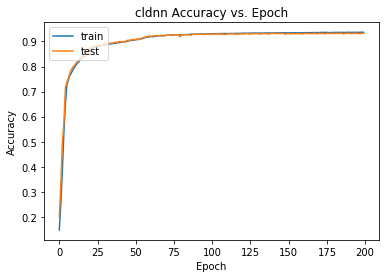

In [ ]:
#Print accuracy of model on testing set after training 
cldnn_scores = cldnn.evaluate(X_test, Y_test)
print "Accuracy: %.2f%%" %(cldnn_scores[1]*100)

#Plot accuracy vs epoch
print cldnn_mdata.history.keys()
plt.plot(cldnn_mdata.history['accuracy'])
plt.plot(cldnn_mdata.history['val_accuracy'])
plt.title('cldnn Accuracy vs. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

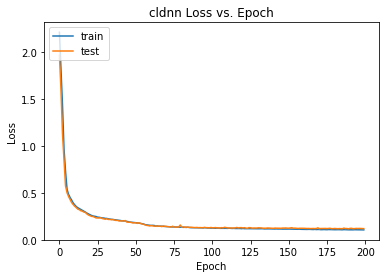

In [ ]:
#Plot loss vs epoch
plt.plot (cldnn_mdata.history [ 'loss' ] )
plt.plot (cldnn_mdata.history [ 'val_loss' ] )
plt.title ('cldnn Loss vs. Epoch')
plt.ylabel ('Loss')
plt.xlabel ('Epoch')
plt.legend (['train' , 'test'] , loc='upper left')
plt.show()

Answer the following questions: 



1.   Is this model a good fit for the data?  

  ANS: Yes, as we can see in the figures above, the loss of the train and testing is very close. So is the accuracy.

2.   Give two ways to improve the robustness of the model.

  ANS: (1) Adding more comprehensive training data (such as data augmentation) to reduce contingency in data
  (2) Clean the data to avoid the noise
  (3) Add Regularization Term